In [13]:
percentile_value

38.999115

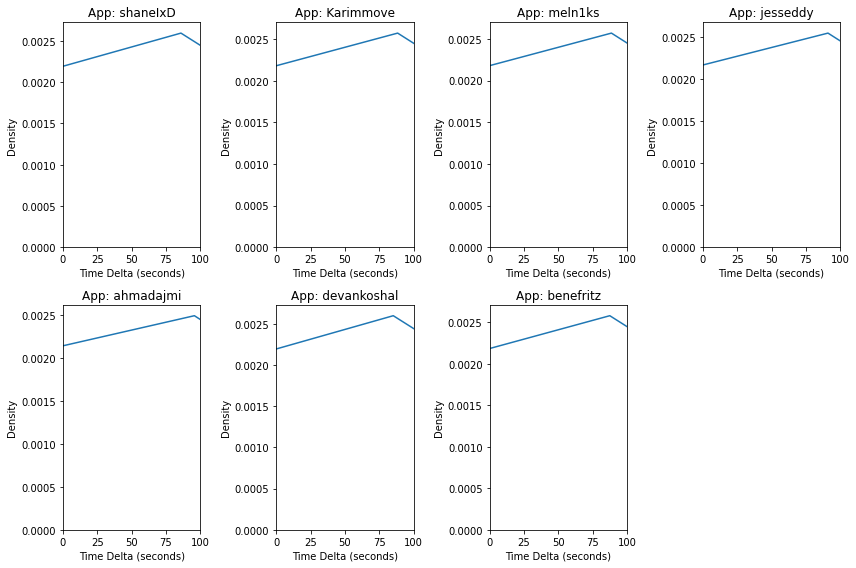

In [27]:
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the filename template
filename_template = "*_timestamps.txt"

# Get the list of files that match the template
files = glob.glob(filename_template)

# Calculate the number of rows and columns for the grid
num_files = len(files)
num_rows = int(num_files ** 0.5)
num_cols = (num_files + num_rows - 1) // num_rows

# Create the figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# Loop over each file
for i, file in enumerate(files):
    # Extract the app name from the filename
    app_name = file.split("_")[0]

    # Read the file and parse the timestamps
    with open(file, 'r') as f:
        timestamps = [datetime.strptime(line.strip(), '%Y-%m-%dT%H:%M:%S.%fZ') for line in f]

    # Sort the timestamps
    timestamps.sort()

    # Calculate the time deltas
    time_deltas = [(timestamps[i] - timestamps[i-1]).total_seconds() for i in range(1, len(timestamps))]

    # Calculate the desired percentile value
    percentile = 99.9999
    percentile_value = np.percentile(time_deltas, percentile)

    # Plot the density plot using seaborn kdeplot
    sns.kdeplot(data=time_deltas, ax=axes[i])
    axes[i].set_xlabel('Time Delta (seconds)')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'App: {app_name}')
    axes[i].set_xlim(0, 100)  # Set x-axis limit based on percentile
    
# Hide extra subplots if necessary
for j in range(num_files, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()